<a href="https://colab.research.google.com/github/opherdonchin/ModelsOfTheMotorSystems2021-2/blob/master/In%20class%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

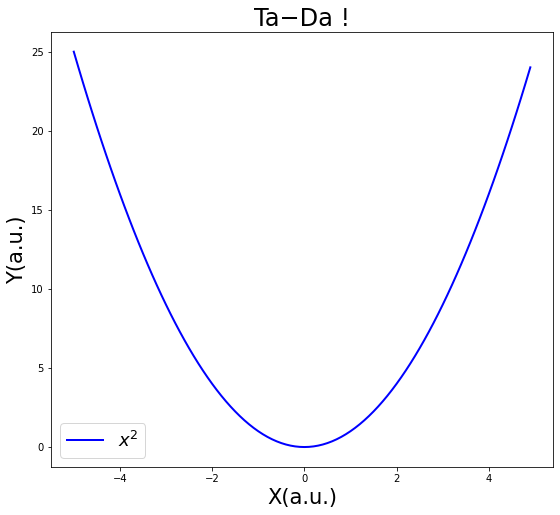

In [3]:
import numpy as np
import matplotlib.pyplot as plt

max , min , n = 5, -5, 100 # max range value , min range value, number of values
X, Y = np.zeros( n ) , np.zeros( n )

for i in range(n):
  x = i*( max - min )/ n + min # calculates each incrementally increasing x value
  y = x**2
  X[ i ], Y[ i ] = x , y

fig , ax = plt.subplots(figsize=(9 ,8))
plt.title('Ta−Da !' , fontsize = 24)
plt.xlabel('X(a.u.)' , fontsize = 21)
plt.ylabel('Y(a.u.)', fontsize = 21)
d0 = plt.errorbar(X,Y, linestyle='-', linewidth=2.0, color='blue')
plt.legend([d0], ['$x^2$'], fontsize=18)
plt.show()

In [ ]:
def spindle():
  f = E*(y - C)*(1 + ((1/A)*dydt)**(1/3))
  x = y + z
  r = H*(z * p*dzdt)


In [47]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

A = 0.3
B = 250
C = -15
def dz_from_state(t, z, x, dx):
  y = x(t)-z
  delta_y = y-C
  dz = dx(t) - A*(((B-1)*z - delta_y)/delta_y)**3
  return dz

H = 350
P = 0.1
def fr_from_state(z, dz):
  fr = H*(z + P*dz)
  return fr



In [68]:


t_span = (0.0, 10.0)
t_eval = np.arange(t_span[0], t_span[1], 0.005)


# x = lambda t : (t<1)*(6+5*t) + (t>=1)*11
# dx = lambda t : (5<1)*5 + (t>=1)*0
x = lambda t : (t<5)*(15+t) + (t>=5)*20
dx = lambda t: (t<5)*5 + (t>=5)*0

z0 = np.atleast_1d( (x(0)-C) / B )

result = solve_ivp(dz_from_state, t_span, z0, args=(x, dx), method='LSODA', t_eval=t_eval)

t = result.t
z = result.y[0,:]
dz = dz_from_state(t, z, x, dx)

fr = fr_from_state(z, dz)


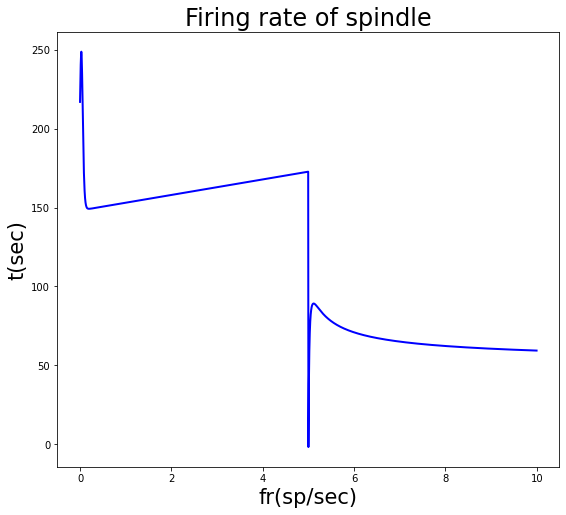

In [69]:
fig , ax = plt.subplots(figsize=(9 ,8))
plt.title('Firing rate of spindle' , fontsize = 24)
plt.xlabel('fr(sp/sec)' , fontsize = 21)
plt.ylabel('t(sec)', fontsize = 21)
plt.plot(t, fr, linestyle='-', linewidth=2.0, color='blue')
plt.show()

In [33]:
z0

array([35.])